# EV Charging Behavior Analysis
## Data Analysis and Cleaning

**Objective:** Analyze the EV charging datasets to identify key predictors for charging behavior prediction.

**Date:** December 2024

---

## 1) Import Required Libraries

Following Lecture 1 and 2, we import the necessary packages for data analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from math import exp, pow, sqrt, log

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2) Load the Datasets

We have four datasets available:
1. **Dataset 1:** EV charging reports (session-level data)
2. **Dataset 2:** Hourly EV per user
3. **Dataset 6:** Local traffic distribution
4. **Weather data:** Norway Trondheim weather information

Following the lecture approach, we use pandas to read CSV files with proper delimiter handling.

In [2]:
# Load Dataset 1: EV Charging Reports
df_charging = pd.read_csv('../../data/trondheim/Dataset 1_EV charging reports.csv', 
                          sep=';', 
                          decimal=',')

print("Dataset 1 - EV Charging Reports:")
print(f"Shape: {df_charging.shape}")
print(f"\nFirst 5 rows:")
df_charging.head()

Dataset 1 - EV Charging Reports:
Shape: (6878, 15)

First 5 rows:


,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category
0,1,AdO3,AdO3-4,Private,NaN,21.12.2018 10:20,10,21.12.2018 10:23,10.0,0.30,0.050000,Dec,Friday,late morning (9-12),Less than 3 hours
1,2,AdO3,AdO3-4,Private,NaN,21.12.2018 10:24,10,21.12.2018 10:32,10.0,0.87,0.136667,Dec,Friday,late morning (9-12),Less than 3 hours
2,3,AdO3,AdO3-4,Private,NaN,21.12.2018 11:33,11,21.12.2018 19:46,19.0,29.87,8.216389,Dec,Friday,late morning (9-12),Between 6 and 9 hours
3,4,AdO3,AdO3-2,Private,NaN,22.12.2018 16:15,16,23.12.2018 16:40,16.0,15.56,24.419722,Dec,Saturday,late afternoon (15-18),More than 18 hours
4,5,AdO3,AdO3-2,Private,NaN,24.12.2018 22:03,22,24.12.2018 23:02,23.0,3.62,0.970556,Dec,Monday,late evening (21-midnight),Less than 3 hours


In [3]:
# Load Dataset 2: Hourly EV per User
df_hourly = pd.read_csv('../../data/trondheim/Dataset_2_Hourly_EV_per_user.csv', 
                        sep=';', 
                        decimal=',')

print("Dataset 2 - Hourly EV per User:")
print(f"Shape: {df_hourly.shape}")
print(f"\nFirst 5 rows:")
df_hourly.head()

Dataset 2 - Hourly EV per User:
Shape: (88156, 8)

First 5 rows:


,date_from,date_to,User_ID,session_ID,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW
0,21.12.2018 10:00,21.12.2018 11:00,AdO3-4,1.0,0.30,0.30,NaN,0.060
1,21.12.2018 10:00,21.12.2018 11:00,AdO3-4,2.0,0.87,0.87,NaN,0.114
2,21.12.2018 11:00,21.12.2018 12:00,AdO3-4,3.0,1.62,3.24,NaN,NaN
3,21.12.2018 12:00,21.12.2018 13:00,AdO3-4,3.0,3.60,7.20,NaN,NaN
4,21.12.2018 13:00,21.12.2018 14:00,AdO3-4,3.0,3.60,7.20,NaN,NaN


In [4]:
# Load Dataset 6: Local Traffic Distribution
df_traffic = pd.read_csv('../../data/trondheim/Dataset 6_Local traffic distribution.csv', 
                         sep=';')

print("Dataset 6 - Local Traffic Distribution:")
print(f"Shape: {df_traffic.shape}")
print(f"\nFirst 5 rows:")
df_traffic.head()

Dataset 6 - Local Traffic Distribution:
Shape: (10248, 7)

First 5 rows:


,Date_from,Date_to,KROPPAN BRU,MOHOLTLIA,SELSBAKK,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen
0,01.12.2018 00:00,01.12.2018 01:00,639,0,0,4,144
1,01.12.2018 01:00,01.12.2018 02:00,487,153,115,21,83
2,01.12.2018 02:00,01.12.2018 03:00,408,85,75,10,69
3,01.12.2018 03:00,01.12.2018 04:00,282,89,56,8,39
4,01.12.2018 04:00,01.12.2018 05:00,165,64,34,3,25


In [5]:
# Load Weather Data
df_weather = pd.read_csv('../../data/trondheim/Norway_Trondheim_ExactLoc_Weather.csv', 
                         index_col=0)

print("Weather Data - Norway Trondheim:")
print(f"Shape: {df_weather.shape}")
print(f"\nFirst 5 rows:")
df_weather.head()

Weather Data - Norway Trondheim:
Shape: (427, 35)

First 5 rows:


,clouds,datetime,dewpt,dhi,dni,ghi,max_dhi,max_dni,max_ghi,max_temp,max_temp_ts,max_uv,max_wind_dir,max_wind_spd,max_wind_spd_ts,min_temp,min_temp_ts,precip,precip_gpm,pres,revision_status,rh,slp,snow,snow_depth,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,66,2018-12-01,-1.7,5,40,6,34,288,48,9.1,1543618800,0.6,187,8.0,1543622400,6.4,1543698000,1.0,1.0,977,final,52.4,993,0.0,NaN,2,127,966,144,52,7.4,1543618800,187,12.8,5.5
1,64,2018-12-02,-2.8,5,38,6,33,281,46,7.3,1543777200,1.2,177,6.0,1543777200,1.4,1543723200,0.0,0.0,975,final,55.4,991,0.0,NaN,5,123,923,135,126,5.4,1543705200,177,10.8,3.6
2,100,2018-12-03,-0.7,5,37,5,33,273,44,7.2,1543867200,0.4,142,3.0,1543867200,0.4,1543870800,4.0,4.0,971,final,80.3,986,8.0,NaN,1,119,881,128,21,2.4,1543791600,142,4.8,1.5
3,93,2018-12-04,-0.5,5,35,5,32,266,42,2.8,1543903200,0.4,234,7.0,1543960800,-1.2,1543957200,7.5,7.5,982,final,91.0,998,37.5,NaN,1,115,842,121,22,0.8,1543878000,234,12.8,3.9
4,87,2018-12-05,-1.9,5,34,5,32,260,41,0.7,1543996800,0.5,206,6.0,1543975200,-1.6,1543971600,8.5,8.5,994,final,90.0,1010,109.5,NaN,2,111,804,114,39,-0.4,1543964400,206,13.6,3.7


## 3) Initial Data Exploration

Following Lecture 2 principles, we examine the structure and data types of each dataset.

### 3.1) Dataset 1: EV Charging Reports - Detailed Analysis

In [6]:
print("=" * 80)
print("DATASET 1: EV CHARGING REPORTS - DETAILED INFORMATION")
print("=" * 80)

print("\n1. Data Types:")
print(df_charging.dtypes)

print("\n2. Summary Statistics:")
print(df_charging.describe())

print("\n3. Missing Values:")
print(df_charging.isnull().sum())

print("\n4. Unique Values per Column:")
for col in df_charging.columns:
    print(f"{col}: {df_charging[col].nunique()} unique values")

DATASET 1: EV CHARGING REPORTS - DETAILED INFORMATION

1. Data Types:
session_ID             int64
Garage_ID             object
User_ID               object
User_type             object
Shared_ID             object
Start_plugin          object
Start_plugin_hour      int64
End_plugout           object
End_plugout_hour     float64
El_kWh               float64
Duration_hours       float64
month_plugin          object
weekdays_plugin       object
Plugin_category       object
Duration_category     object
dtype: object

2. Summary Statistics:
        session_ID  Start_plugin_hour  End_plugout_hour       El_kWh  \
count  6878.000000        6878.000000       6844.000000  6878.000000   
mean   3439.500000          16.325240         12.546902    12.720744   
std    1985.651908           4.363108          5.256756    11.787938   
min       1.000000           0.000000          0.000000     0.010000   
25%    1720.250000          15.000000          7.000000     5.200000   
50%    3439.500000       

### 3.2) Dataset 2: Hourly EV per User - Detailed Analysis

In [7]:
print("=" * 80)
print("DATASET 2: HOURLY EV PER USER - DETAILED INFORMATION")
print("=" * 80)

print("\n1. Data Types:")
print(df_hourly.dtypes)

print("\n2. Summary Statistics:")
print(df_hourly.describe())

print("\n3. Missing Values:")
print(df_hourly.isnull().sum())

DATASET 2: HOURLY EV PER USER - DETAILED INFORMATION

1. Data Types:
date_from           object
date_to             object
User_ID             object
session_ID         float64
Synthetic_3_6kW    float64
Synthetic_7_2kW    float64
Flex_3_6kW         float64
Flex_7_2kW         float64
dtype: object

2. Summary Statistics:
         session_ID  Synthetic_3_6kW  Synthetic_7_2kW    Flex_3_6kW  \
count  87766.000000     3.111000e+04     1.895700e+04  6.208600e+04   
mean    3529.561846     2.812241e+00     4.614975e+00  3.288170e+00   
std     1991.114139     1.134489e+00     2.464613e+00  8.331529e-01   
min        1.000000     4.000000e-16     1.600000e-15  4.000000e-16   
25%     1820.000000     2.040000e+00     2.380000e+00  3.600000e+00   
50%     3625.000000     3.600000e+00     4.950000e+00  3.600000e+00   
75%     5321.000000     3.600000e+00     7.200000e+00  3.600000e+00   
max     6878.000000     3.600000e+00     7.200000e+00  3.600000e+00   

         Flex_7_2kW  
count  7.262400

### 3.3) Dataset 6: Traffic Distribution - Detailed Analysis

In [8]:
print("=" * 80)
print("DATASET 6: LOCAL TRAFFIC DISTRIBUTION - DETAILED INFORMATION")
print("=" * 80)

print("\n1. Data Types:")
print(df_traffic.dtypes)

print("\n2. Summary Statistics:")
print(df_traffic.describe())

print("\n3. Missing Values:")
print(df_traffic.isnull().sum())

print("\n4. Traffic Locations:")
traffic_locations = [col for col in df_traffic.columns if col not in ['Date_from', 'Date_to']]
print(f"Available locations: {traffic_locations}")

DATASET 6: LOCAL TRAFFIC DISTRIBUTION - DETAILED INFORMATION

1. Data Types:
Date_from                               object
Date_to                                 object
KROPPAN BRU                             object
MOHOLTLIA                               object
SELSBAKK                                object
MOHOLT RAMPE 2                           int64
Jonsvannsveien vest for Steinanvegen     int64
dtype: object

2. Summary Statistics:
       MOHOLT RAMPE 2  Jonsvannsveien vest for Steinanvegen
count    10248.000000                          10248.000000
mean       101.023907                            405.141686
std         86.552135                            320.922573
min          0.000000                              0.000000
25%         16.000000                             81.000000
50%         94.000000                            395.000000
75%        163.000000                            626.000000
max        461.000000                           1382.000000

3. Missing Valu

### 3.4) Weather Data - Detailed Analysis

In [9]:
print("=" * 80)
print("WEATHER DATA - DETAILED INFORMATION")
print("=" * 80)

print("\n1. Data Types:")
print(df_weather.dtypes)

print("\n2. Summary Statistics:")
print(df_weather.describe())

print("\n3. Missing Values:")
print(df_weather.isnull().sum())

print("\n4. Available Weather Features:")
print(list(df_weather.columns))

WEATHER DATA - DETAILED INFORMATION

1. Data Types:
clouds               int64
datetime            object
dewpt              float64
dhi                  int64
dni                  int64
ghi                  int64
max_dhi              int64
max_dni              int64
max_ghi              int64
max_temp           float64
max_temp_ts          int64
max_uv             float64
max_wind_dir         int64
max_wind_spd       float64
max_wind_spd_ts      int64
min_temp           float64
min_temp_ts          int64
precip             float64
precip_gpm         float64
pres                 int64
revision_status     object
rh                 float64
slp                  int64
snow               float64
snow_depth         float64
solar_rad            int64
t_dhi                int64
t_dni                int64
t_ghi                int64
t_solar_rad          int64
temp               float64
ts                   int64
wind_dir             int64
wind_gust_spd      float64
wind_spd           float64
dty

## 4) Target Variable Analysis

Based on the datasets, potential target variables for predicting charging behavior could be:
- **Energy consumed (El_kWh)** - Amount of electricity used
- **Duration (Duration_hours)** - How long the vehicle was charging

Let's analyze these target variables in detail.

### 4.1) Energy Consumption (El_kWh) Analysis

In [10]:
# Statistical summary of energy consumption
print("Energy Consumption Statistics:")
print(f"Mean: {df_charging['El_kWh'].mean():.2f} kWh")
print(f"Median: {df_charging['El_kWh'].median():.2f} kWh")
print(f"Std Dev: {df_charging['El_kWh'].std():.2f} kWh")
print(f"Min: {df_charging['El_kWh'].min():.2f} kWh")
print(f"Max: {df_charging['El_kWh'].max():.2f} kWh")

# Calculate quartiles
q1 = df_charging['El_kWh'].quantile(0.25)
q2 = df_charging['El_kWh'].quantile(0.50)
q3 = df_charging['El_kWh'].quantile(0.75)

print(f"\nQuartiles:")
print(f"Q1 (25%): {q1:.2f} kWh")
print(f"Q2 (50%): {q2:.2f} kWh")
print(f"Q3 (75%): {q3:.2f} kWh")

Energy Consumption Statistics:
Mean: 12.72 kWh
Median: 9.05 kWh
Std Dev: 11.79 kWh
Min: 0.01 kWh
Max: 80.86 kWh

Quartiles:
Q1 (25%): 5.20 kWh
Q2 (50%): 9.05 kWh
Q3 (75%): 16.09 kWh


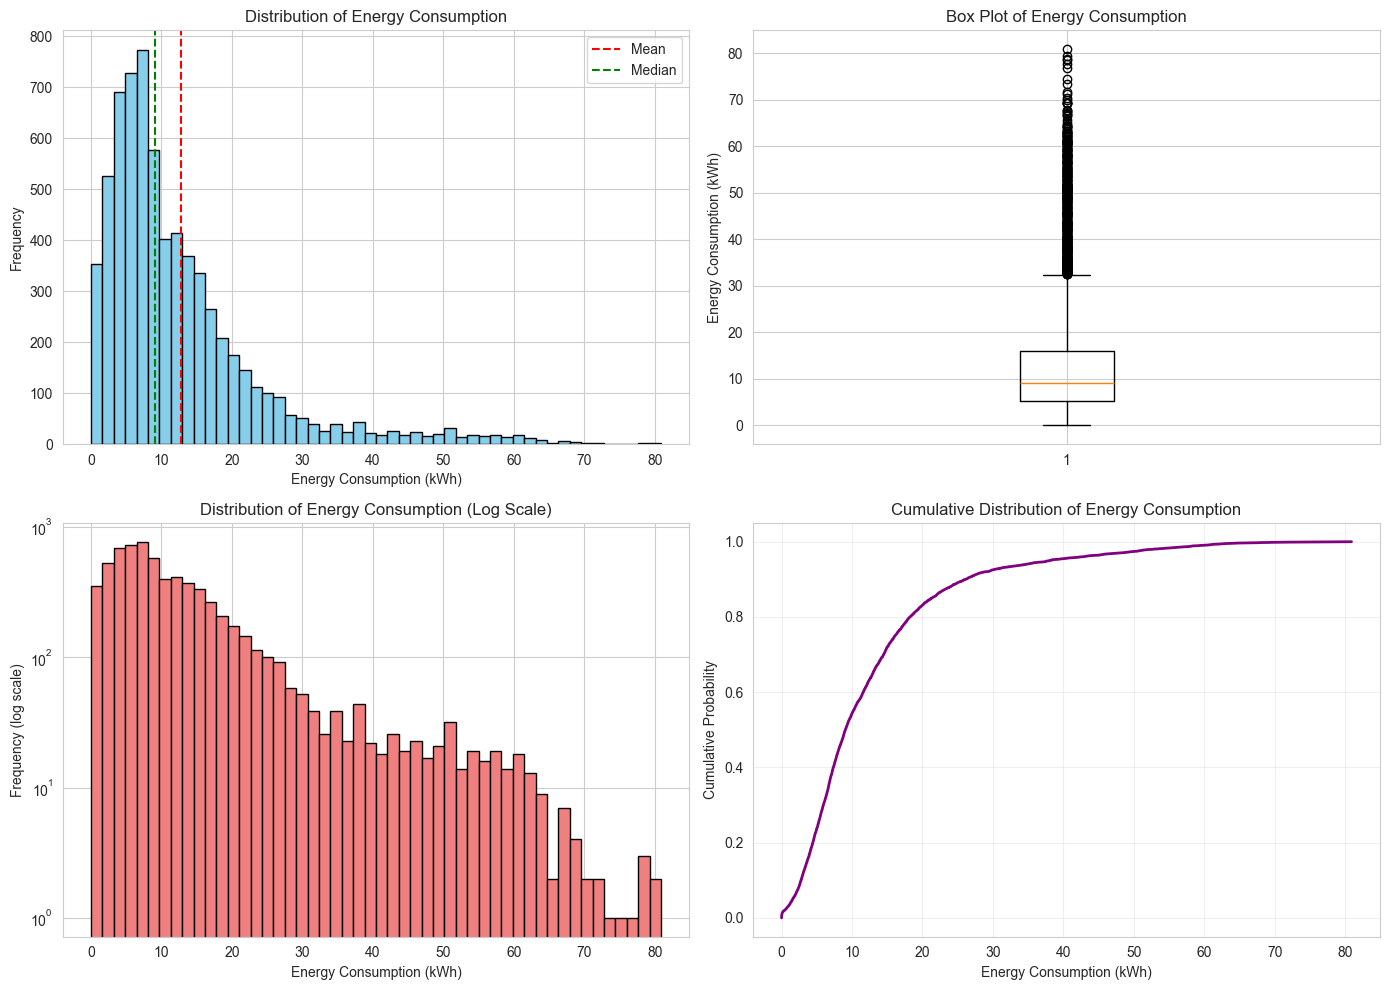

In [11]:
# Visualization of Energy Consumption Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
axes[0, 0].hist(df_charging['El_kWh'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Energy Consumption (kWh)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Energy Consumption')
axes[0, 0].axvline(df_charging['El_kWh'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].axvline(df_charging['El_kWh'].median(), color='green', linestyle='--', label='Median')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df_charging['El_kWh'])
axes[0, 1].set_ylabel('Energy Consumption (kWh)')
axes[0, 1].set_title('Box Plot of Energy Consumption')

# Log-scale histogram for better visualization
axes[1, 0].hist(df_charging['El_kWh'], bins=50, color='lightcoral', edgecolor='black')
axes[1, 0].set_xlabel('Energy Consumption (kWh)')
axes[1, 0].set_ylabel('Frequency (log scale)')
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Distribution of Energy Consumption (Log Scale)')

# Cumulative distribution
sorted_data = np.sort(df_charging['El_kWh'])
cumulative = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1, 1].plot(sorted_data, cumulative, color='purple', linewidth=2)
axes[1, 1].set_xlabel('Energy Consumption (kWh)')
axes[1, 1].set_ylabel('Cumulative Probability')
axes[1, 1].set_title('Cumulative Distribution of Energy Consumption')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.2) Duration Analysis

In [14]:
# Statistical summary of charging duration
print("Charging Duration Statistics:")
print(f"Mean: {df_charging['Duration_hours'].mean():.2f} hours")
print(f"Median: {df_charging['Duration_hours'].median():.2f} hours")
print(f"Std Dev: {df_charging['Duration_hours'].std():.2f} hours")
print(f"Min: {df_charging['Duration_hours'].min():.2f} hours")
print(f"Max: {df_charging['Duration_hours'].max():.2f} hours")

# Quartiles
print(f"\nQuartiles:")
print(f"Q1 (25%): {df_charging['Duration_hours'].quantile(0.25):.2f} hours")
print(f"Q2 (50%): {df_charging['Duration_hours'].quantile(0.50):.2f} hours")
print(f"Q3 (75%): {df_charging['Duration_hours'].quantile(0.75):.2f} hours")

Charging Duration Statistics:
Mean: 11.50 hours
Median: 10.03 hours
Std Dev: 14.15 hours
Min: 0.00 hours
Max: 255.03 hours

Quartiles:
Q1 (25%): 2.79 hours
Q2 (50%): 10.03 hours
Q3 (75%): 15.22 hours


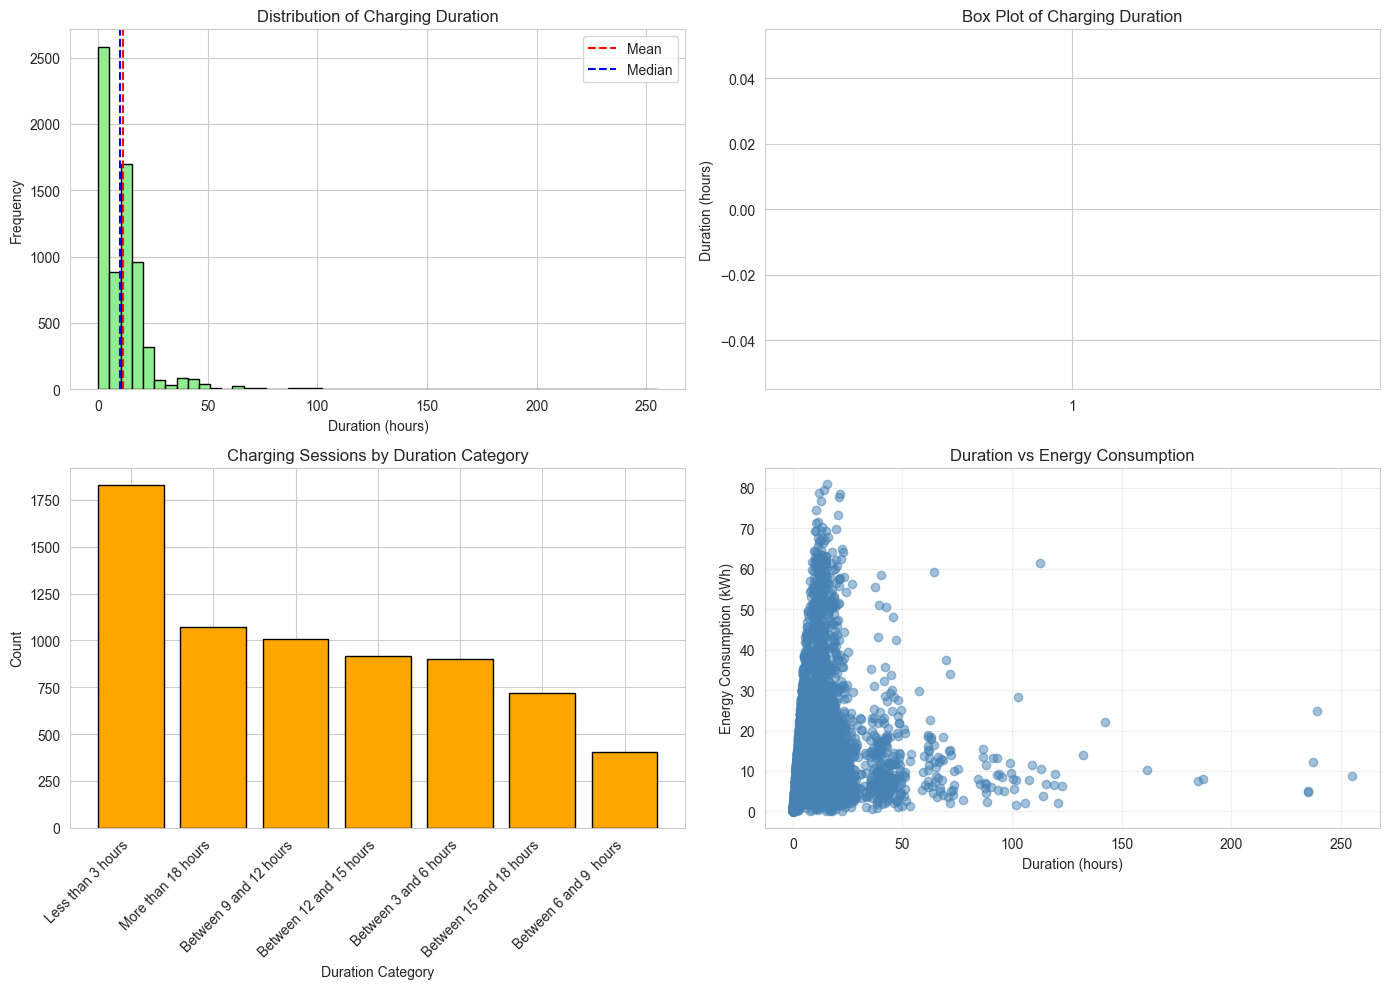

In [15]:
# Visualization of Duration Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
axes[0, 0].hist(df_charging['Duration_hours'], bins=50, color='lightgreen', edgecolor='black')
axes[0, 0].set_xlabel('Duration (hours)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Charging Duration')
axes[0, 0].axvline(df_charging['Duration_hours'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].axvline(df_charging['Duration_hours'].median(), color='blue', linestyle='--', label='Median')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df_charging['Duration_hours'])
axes[0, 1].set_ylabel('Duration (hours)')
axes[0, 1].set_title('Box Plot of Charging Duration')

# Duration by category
duration_counts = df_charging['Duration_category'].value_counts()
axes[1, 0].bar(range(len(duration_counts)), duration_counts.values, color='orange', edgecolor='black')
axes[1, 0].set_xticks(range(len(duration_counts)))
axes[1, 0].set_xticklabels(duration_counts.index, rotation=45, ha='right')
axes[1, 0].set_xlabel('Duration Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Charging Sessions by Duration Category')

# Scatter: Duration vs Energy
axes[1, 1].scatter(df_charging['Duration_hours'], df_charging['El_kWh'], 
                   alpha=0.5, color='steelblue')
axes[1, 1].set_xlabel('Duration (hours)')
axes[1, 1].set_ylabel('Energy Consumption (kWh)')
axes[1, 1].set_title('Duration vs Energy Consumption')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5) Predictor Variables Analysis

Now we analyze potential predictor variables and their relationships with our target variables.

### 5.1) Temporal Patterns

In [16]:
# Analyze temporal patterns - Hour of day
print("Hour of Day Statistics:")
hour_stats = df_charging.groupby('Start_plugin_hour').agg({
    'El_kWh': ['mean', 'median', 'count'],
    'Duration_hours': ['mean', 'median']
})
print(hour_stats)

Hour of Day Statistics:
                      El_kWh               Duration_hours           
                        mean  median count           mean     median
Start_plugin_hour                                                   
0                  19.137059  14.845   102      10.179178  10.102500
1                  14.373000  14.025    40      13.296250  11.217222
2                  13.063200  14.860    25       9.927856   8.938611
3                  18.434706  13.510    17       8.118954   8.439722
4                  10.737143  13.860     7       6.034960   5.880833
5                   9.648889  12.430     9      15.020556   2.666667
6                  14.083684  15.840    19       9.388333   8.211667
7                  14.476329  13.110    79       5.470288   4.429722
8                  15.352840  13.310    81       7.166032   4.122500
9                   9.931667   6.790    66       7.237858   3.474861
10                 10.399052   7.190   116       8.681358   3.223333
11        

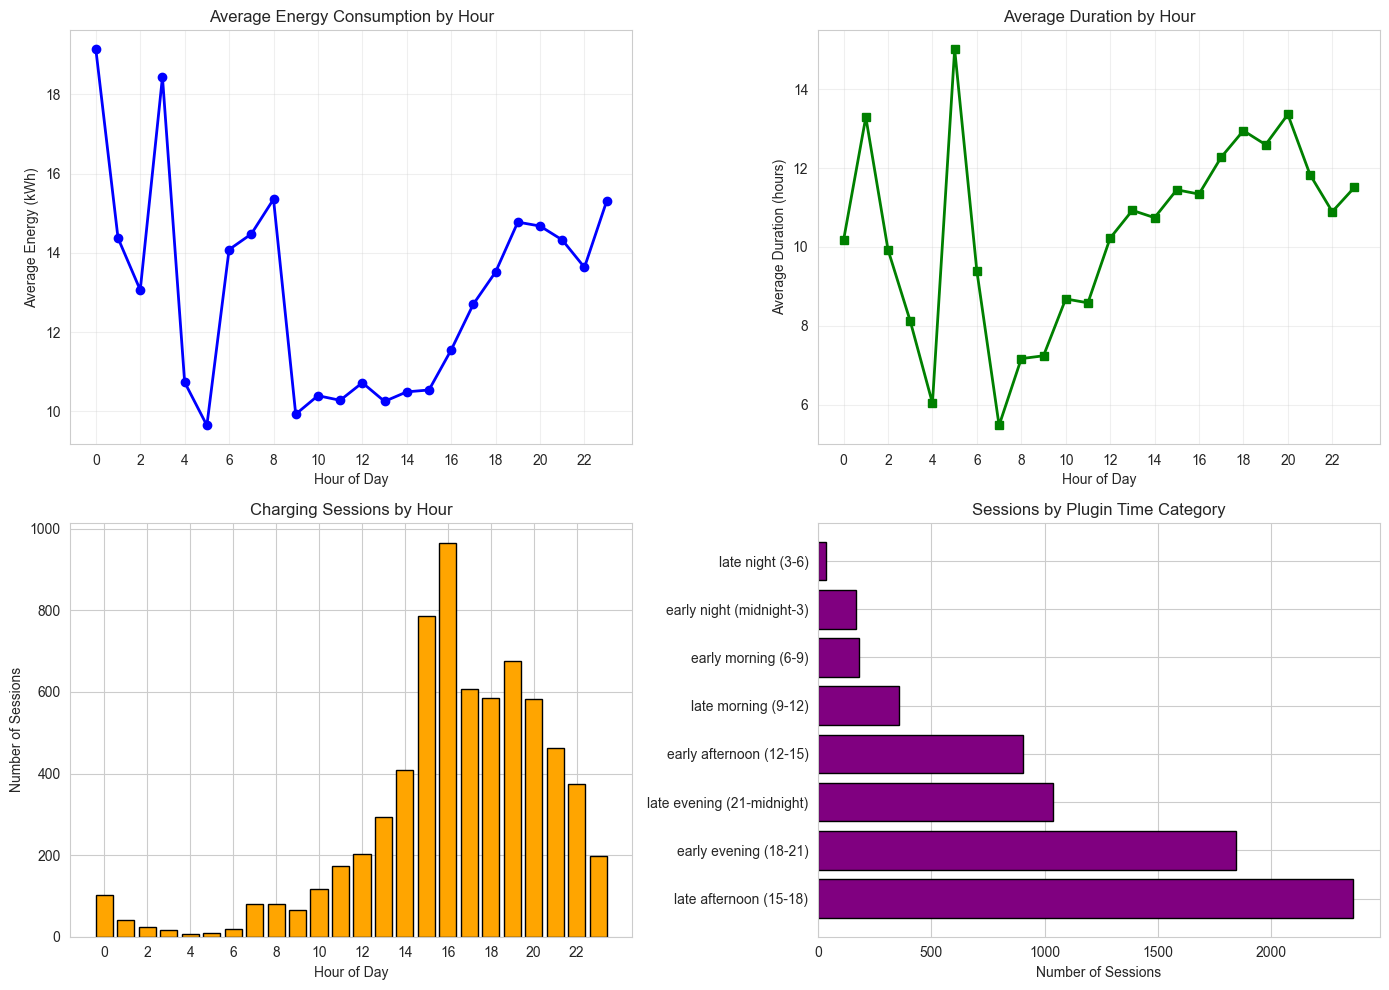

In [17]:
# Visualization: Energy consumption by hour of day
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Energy by hour
hour_energy = df_charging.groupby('Start_plugin_hour')['El_kWh'].mean()
axes[0, 0].plot(hour_energy.index, hour_energy.values, marker='o', linewidth=2, color='blue')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Average Energy (kWh)')
axes[0, 0].set_title('Average Energy Consumption by Hour')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(0, 24, 2))

# Duration by hour
hour_duration = df_charging.groupby('Start_plugin_hour')['Duration_hours'].mean()
axes[0, 1].plot(hour_duration.index, hour_duration.values, marker='s', linewidth=2, color='green')
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Average Duration (hours)')
axes[0, 1].set_title('Average Duration by Hour')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(range(0, 24, 2))

# Number of sessions by hour
hour_count = df_charging['Start_plugin_hour'].value_counts().sort_index()
axes[1, 0].bar(hour_count.index, hour_count.values, color='orange', edgecolor='black')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Number of Sessions')
axes[1, 0].set_title('Charging Sessions by Hour')
axes[1, 0].set_xticks(range(0, 24, 2))

# Plugin category distribution
plugin_cat = df_charging['Plugin_category'].value_counts()
axes[1, 1].barh(range(len(plugin_cat)), plugin_cat.values, color='purple', edgecolor='black')
axes[1, 1].set_yticks(range(len(plugin_cat)))
axes[1, 1].set_yticklabels(plugin_cat.index)
axes[1, 1].set_xlabel('Number of Sessions')
axes[1, 1].set_title('Sessions by Plugin Time Category')

plt.tight_layout()
plt.show()

### 5.2) Day of Week Patterns

In [18]:
# Weekday analysis
print("Weekday Statistics:")
weekday_stats = df_charging.groupby('weekdays_plugin').agg({
    'El_kWh': ['mean', 'median', 'count'],
    'Duration_hours': ['mean', 'median']
})
print(weekday_stats)

Weekday Statistics:
                    El_kWh               Duration_hours           
                      mean  median count           mean     median
weekdays_plugin                                                   
Friday           11.918356   8.485  1034      13.390919   9.959167
Monday           11.998614   8.890   981      11.432806   9.812222
Saturday         12.530164   8.460   854      13.914938  10.673056
Sunday           14.779414  10.470   955      11.146042  10.558333
Thursday         13.078284   9.240  1072      10.450388   9.613056
Tuesday          12.315323   9.140   943      10.375343  10.211111
Wednesday        12.464572   9.040  1039      10.136469   9.935556


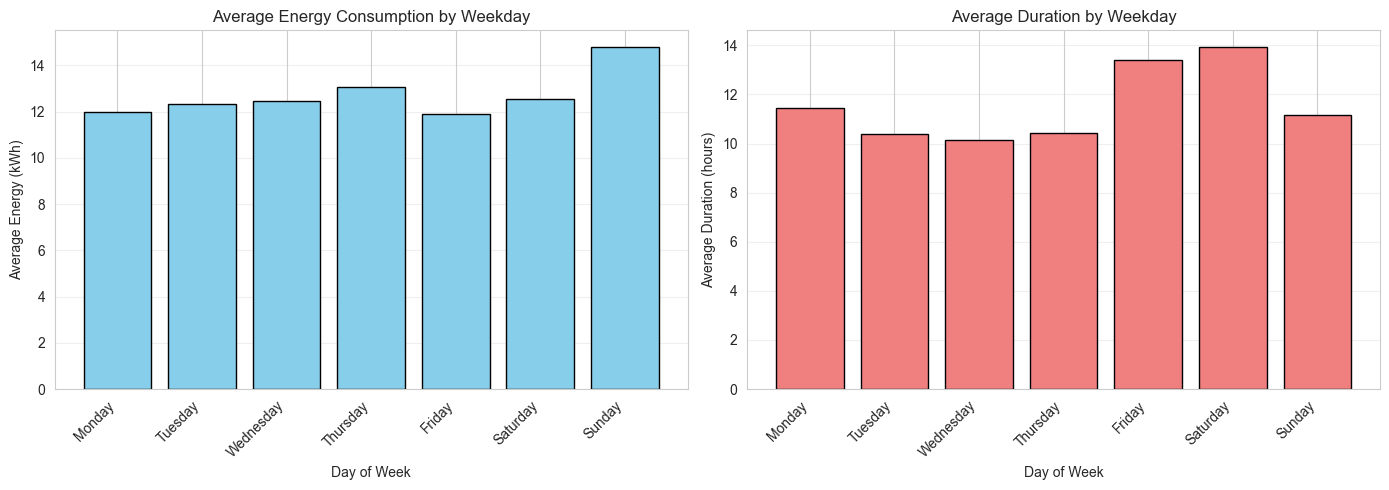

In [19]:
# Visualization: Weekday patterns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Energy by weekday
weekday_energy = df_charging.groupby('weekdays_plugin')['El_kWh'].mean().reindex(weekday_order)
axes[0].bar(range(len(weekday_energy)), weekday_energy.values, color='skyblue', edgecolor='black')
axes[0].set_xticks(range(len(weekday_energy)))
axes[0].set_xticklabels(weekday_energy.index, rotation=45, ha='right')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Average Energy (kWh)')
axes[0].set_title('Average Energy Consumption by Weekday')
axes[0].grid(True, alpha=0.3, axis='y')

# Duration by weekday
weekday_duration = df_charging.groupby('weekdays_plugin')['Duration_hours'].mean().reindex(weekday_order)
axes[1].bar(range(len(weekday_duration)), weekday_duration.values, color='lightcoral', edgecolor='black')
axes[1].set_xticks(range(len(weekday_duration)))
axes[1].set_xticklabels(weekday_duration.index, rotation=45, ha='right')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Average Duration (hours)')
axes[1].set_title('Average Duration by Weekday')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 5.3) Monthly Patterns

In [20]:
# Monthly analysis
print("Monthly Statistics:")
month_stats = df_charging.groupby('month_plugin').agg({
    'El_kWh': ['mean', 'median', 'count'],
    'Duration_hours': ['mean', 'median']
})
print(month_stats)

Monthly Statistics:
                 El_kWh               Duration_hours           
                   mean  median count           mean     median
month_plugin                                                   
Apr           10.378791   9.045   306      10.488273   9.555972
Aug           15.544006  12.540   362      10.797828   8.792500
Dec           12.094086   8.210  1143      12.565891  10.658194
Feb           11.321630  10.280   135      15.331918   9.942500
Jan           12.331712   8.250  1361      12.019503  10.664444
Jul           13.966218  12.460   238       9.825998   7.734444
Jun           13.125223  10.760   291       9.758701   9.455833
Mar           11.760199  10.740   301      11.631201  10.298611
May           11.984965  10.565   288      10.723582   7.797500
Nov           12.729855   8.390  1107      11.850886  10.757500
Oct           12.806036   8.700   845      10.948432   9.828333
Sep           14.984192  11.090   501      10.210744   9.388056


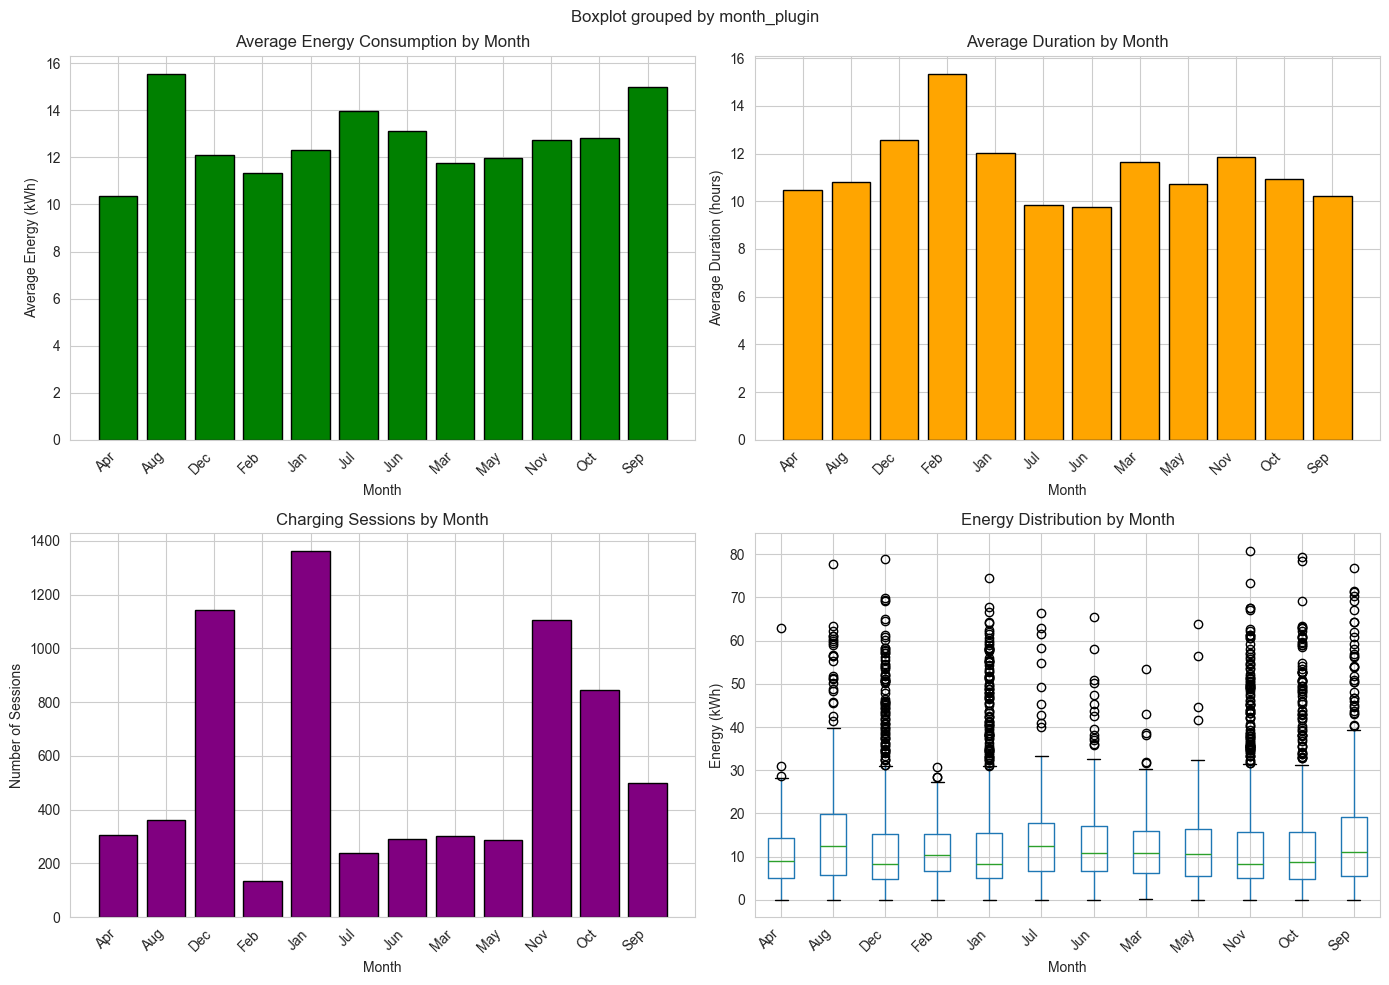

In [21]:
# Visualization: Monthly patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Energy by month
month_energy = df_charging.groupby('month_plugin')['El_kWh'].mean()
axes[0, 0].bar(range(len(month_energy)), month_energy.values, color='green', edgecolor='black')
axes[0, 0].set_xticks(range(len(month_energy)))
axes[0, 0].set_xticklabels(month_energy.index, rotation=45, ha='right')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Energy (kWh)')
axes[0, 0].set_title('Average Energy Consumption by Month')

# Duration by month
month_duration = df_charging.groupby('month_plugin')['Duration_hours'].mean()
axes[0, 1].bar(range(len(month_duration)), month_duration.values, color='orange', edgecolor='black')
axes[0, 1].set_xticks(range(len(month_duration)))
axes[0, 1].set_xticklabels(month_duration.index, rotation=45, ha='right')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Duration (hours)')
axes[0, 1].set_title('Average Duration by Month')

# Sessions per month
month_count = df_charging['month_plugin'].value_counts().sort_index()
axes[1, 0].bar(range(len(month_count)), month_count.values, color='purple', edgecolor='black')
axes[1, 0].set_xticks(range(len(month_count)))
axes[1, 0].set_xticklabels(month_count.index, rotation=45, ha='right')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Sessions')
axes[1, 0].set_title('Charging Sessions by Month')

# Box plot: Energy by month
df_charging.boxplot(column='El_kWh', by='month_plugin', ax=axes[1, 1])
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Energy (kWh)')
axes[1, 1].set_title('Energy Distribution by Month')
plt.sca(axes[1, 1])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### 5.4) User Type and Garage Analysis

In [22]:
# User type analysis
print("User Type Statistics:")
print(df_charging['User_type'].value_counts())
print("\nBy User Type:")
user_stats = df_charging.groupby('User_type').agg({
    'El_kWh': ['mean', 'median', 'count'],
    'Duration_hours': ['mean', 'median']
})
print(user_stats)

User Type Statistics:
User_type
Private    5466
Shared     1412
Name: count, dtype: int64

By User Type:
              El_kWh               Duration_hours           
                mean  median count           mean     median
User_type                                                   
Private    11.202226   8.210  5466      12.784593  11.247500
Shared     18.599086  14.705  1412       6.535401   3.999306


In [23]:
# Garage analysis
print("\nGarage Statistics:")
print(f"Number of unique garages: {df_charging['Garage_ID'].nunique()}")
print("\nTop 10 Garages by number of sessions:")
print(df_charging['Garage_ID'].value_counts().head(10))


Garage Statistics:
Number of unique garages: 24

Top 10 Garages by number of sessions:
Garage_ID
Bl2      2243
AsO2      665
AdO1      586
UT9       421
AdO3      379
UT7       313
MS1       270
AsO10     253
NR1       224
SR2       221
Name: count, dtype: int64


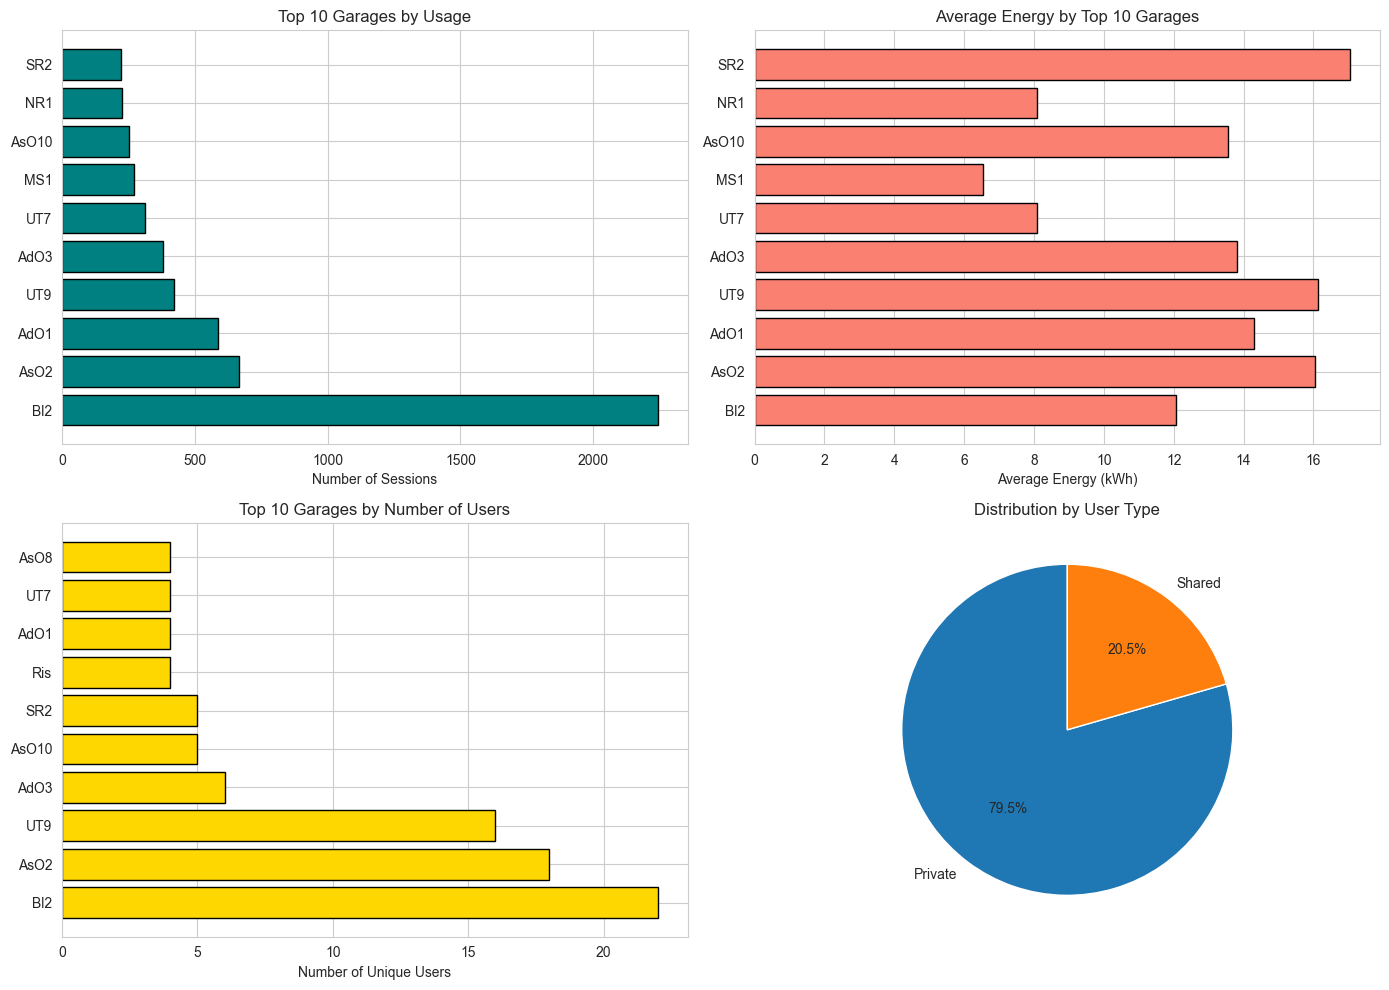

In [24]:
# Visualization: Garage patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top garages by usage
top_garages = df_charging['Garage_ID'].value_counts().head(10)
axes[0, 0].barh(range(len(top_garages)), top_garages.values, color='teal', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_garages)))
axes[0, 0].set_yticklabels(top_garages.index)
axes[0, 0].set_xlabel('Number of Sessions')
axes[0, 0].set_title('Top 10 Garages by Usage')

# Average energy by top garages
top_garage_ids = top_garages.index
garage_energy = df_charging[df_charging['Garage_ID'].isin(top_garage_ids)].groupby('Garage_ID')['El_kWh'].mean()
garage_energy = garage_energy.reindex(top_garage_ids)
axes[0, 1].barh(range(len(garage_energy)), garage_energy.values, color='salmon', edgecolor='black')
axes[0, 1].set_yticks(range(len(garage_energy)))
axes[0, 1].set_yticklabels(garage_energy.index)
axes[0, 1].set_xlabel('Average Energy (kWh)')
axes[0, 1].set_title('Average Energy by Top 10 Garages')

# Number of unique users
users_per_garage = df_charging.groupby('Garage_ID')['User_ID'].nunique().sort_values(ascending=False).head(10)
axes[1, 0].barh(range(len(users_per_garage)), users_per_garage.values, color='gold', edgecolor='black')
axes[1, 0].set_yticks(range(len(users_per_garage)))
axes[1, 0].set_yticklabels(users_per_garage.index)
axes[1, 0].set_xlabel('Number of Unique Users')
axes[1, 0].set_title('Top 10 Garages by Number of Users')

# User type distribution
user_type_counts = df_charging['User_type'].value_counts()
axes[1, 1].pie(user_type_counts.values, labels=user_type_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Distribution by User Type')

plt.tight_layout()
plt.show()

## 6) Correlation Analysis

Now we examine correlations between numeric variables to identify strong relationships.

In [25]:
# Create a subset with only numeric columns for correlation analysis
numeric_cols = ['session_ID', 'Start_plugin_hour', 'End_plugout_hour', 'El_kWh', 'Duration_hours']
df_numeric = df_charging[numeric_cols].copy()

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   session_ID  Start_plugin_hour  End_plugout_hour    El_kWh  \
session_ID           1.000000          -0.018062         -0.035839 -0.011242   
Start_plugin_hour   -0.018062           1.000000         -0.146133  0.044599   
End_plugout_hour    -0.035839          -0.146133          1.000000 -0.196542   
El_kWh              -0.011242           0.044599         -0.196542  1.000000   
Duration_hours       0.044786           0.063061         -0.242469  0.105448   

                   Duration_hours  
session_ID               0.044786  
Start_plugin_hour        0.063061  
End_plugout_hour        -0.242469  
El_kWh                   0.105448  
Duration_hours           1.000000  


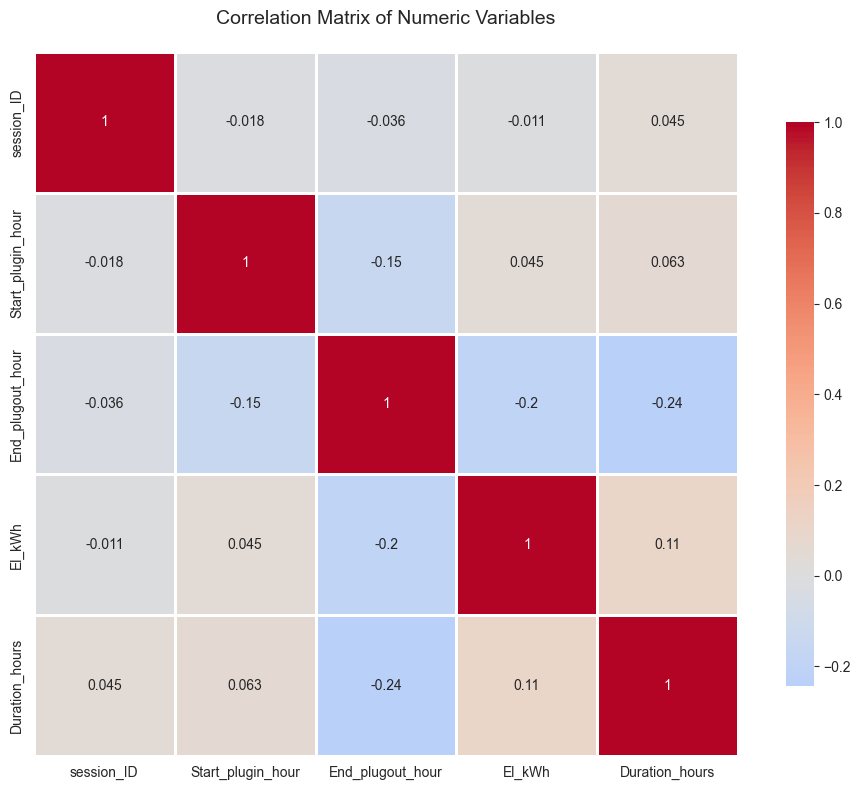

In [26]:
# Visualization: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

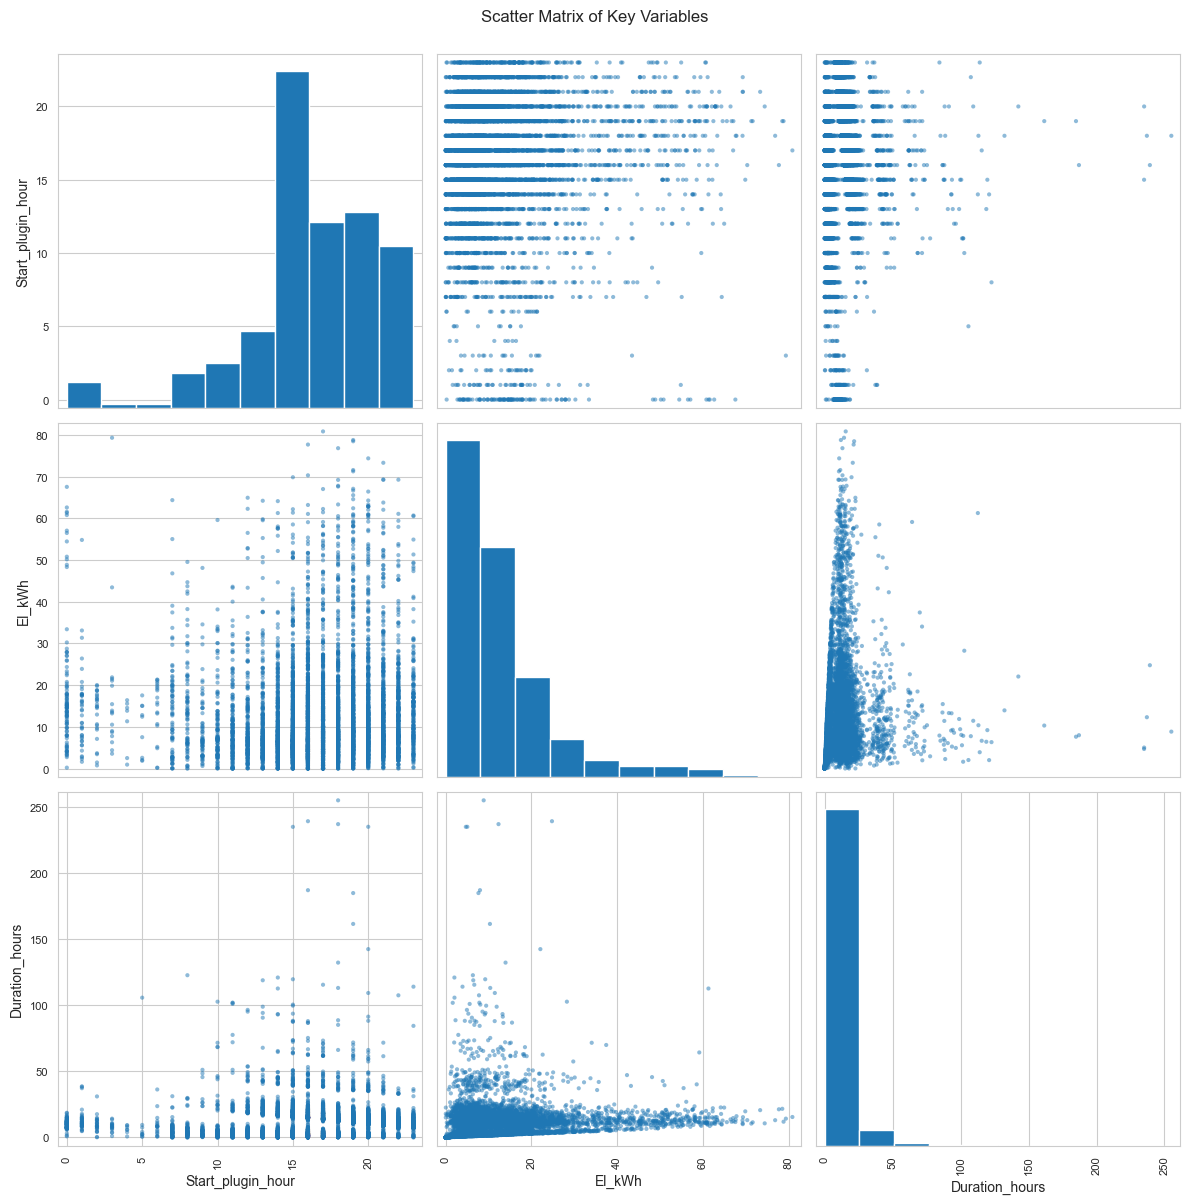

In [27]:
# Scatter plot matrix for key variables
from pandas.plotting import scatter_matrix

key_vars = ['Start_plugin_hour', 'El_kWh', 'Duration_hours']
scatter_matrix(df_charging[key_vars], figsize=(12, 12), diagonal='hist', alpha=0.5)
plt.suptitle('Scatter Matrix of Key Variables', y=1.0)
plt.tight_layout()
plt.show()

## 7) Data Quality Assessment

Check for data quality issues that need to be addressed during cleaning.

In [28]:
print("=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

# 1. Check for zero or negative values
print("\n1. Zero or Negative Energy Values:")
zero_energy = (df_charging['El_kWh'] <= 0).sum()
print(f"   Sessions with zero or negative energy: {zero_energy}")

print("\n2. Zero or Negative Duration:")
zero_duration = (df_charging['Duration_hours'] <= 0).sum()
print(f"   Sessions with zero or negative duration: {zero_duration}")

# 3. Check for outliers using IQR method
print("\n3. Outlier Detection (IQR method):")
Q1_energy = df_charging['El_kWh'].quantile(0.25)
Q3_energy = df_charging['El_kWh'].quantile(0.75)
IQR_energy = Q3_energy - Q1_energy
outliers_energy = ((df_charging['El_kWh'] < (Q1_energy - 1.5 * IQR_energy)) | 
                   (df_charging['El_kWh'] > (Q3_energy + 1.5 * IQR_energy))).sum()
print(f"   Energy outliers: {outliers_energy} ({outliers_energy/len(df_charging)*100:.2f}%)")

Q1_duration = df_charging['Duration_hours'].quantile(0.25)
Q3_duration = df_charging['Duration_hours'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
outliers_duration = ((df_charging['Duration_hours'] < (Q1_duration - 1.5 * IQR_duration)) | 
                     (df_charging['Duration_hours'] > (Q3_duration + 1.5 * IQR_duration))).sum()
print(f"   Duration outliers: {outliers_duration} ({outliers_duration/len(df_charging)*100:.2f}%)")

# 4. Check for duplicate sessions
print("\n4. Duplicate Session IDs:")
duplicates = df_charging['session_ID'].duplicated().sum()
print(f"   Duplicate session IDs: {duplicates}")

# 5. Date format issues
print("\n5. Date Columns:")
print(f"   Start_plugin data type: {df_charging['Start_plugin'].dtype}")
print(f"   End_plugout data type: {df_charging['End_plugout'].dtype}")

DATA QUALITY ASSESSMENT

1. Zero or Negative Energy Values:
   Sessions with zero or negative energy: 0

2. Zero or Negative Duration:
   Sessions with zero or negative duration: 0

3. Outlier Detection (IQR method):
   Energy outliers: 457 (6.64%)
   Duration outliers: 314 (4.57%)

4. Duplicate Session IDs:
   Duplicate session IDs: 0

5. Date Columns:
   Start_plugin data type: object
   End_plugout data type: object


## 8) Summary of Findings

### 8.1) Target Variables
Based on the analysis, we recommend two potential target variables:

1. **Energy Consumption (El_kWh)**
   - Most direct measure of charging behavior
   - Shows clear patterns by time and usage
   - Strong correlation with duration

2. **Duration (Duration_hours)**
   - Important for charging station planning
   - Shows temporal patterns
   - Can be predicted for resource allocation

### 8.2) Key Predictors Identified

From Dataset 1 (Charging Reports):
- **Temporal features**: Hour of day, day of week, month
- **Location**: Garage_ID
- **User information**: User_type
- **Plugin category**: Time of day category

Additional potential predictors:
- **Weather data**: Temperature, precipitation (Dataset: Weather)
- **Traffic data**: Local traffic volumes (Dataset 6)

### 8.3) Recommended Datasets for Final Model

1. **Primary Dataset**: Dataset 1 (EV Charging Reports)
   - Contains all essential features
   - Target variables present
   - Good data quality

2. **Supplementary Dataset**: Weather Data
   - Can be merged by date
   - Temperature affects battery performance
   - Precipitation may affect usage patterns

3. **Optional Dataset**: Traffic Data
   - May correlate with charging patterns
   - Requires careful temporal alignment

### 8.4) Data Cleaning Requirements

1. Convert date columns to datetime format
2. Handle outliers (consider domain knowledge)
3. Check for and handle zero/negative values
4. Create additional temporal features (day of year, week of year)
5. Encode categorical variables appropriately
6. Merge weather data by date
7. Handle missing values (NA in Shared_ID)

## 9) Next Steps

1. **Data Cleaning**:
   - Convert dates to proper datetime format
   - Handle outliers and invalid values
   - Create engineered features

2. **Data Integration**:
   - Merge weather data with charging data
   - Optionally integrate traffic data
   - Create unified dataset for modeling

3. **Feature Engineering**:
   - Create interaction features
   - Encode categorical variables
   - Scale numeric features

4. **Model Development**:
   - Split data into train/test sets
   - Try multiple algorithms
   - Evaluate and compare models

In [29]:
# Save key statistics for reference
summary_stats = {
    'total_sessions': len(df_charging),
    'avg_energy_kwh': df_charging['El_kWh'].mean(),
    'avg_duration_hours': df_charging['Duration_hours'].mean(),
    'num_garages': df_charging['Garage_ID'].nunique(),
    'num_users': df_charging['User_ID'].nunique(),
    'date_range_start': df_charging['Start_plugin'].min(),
    'date_range_end': df_charging['Start_plugin'].max()
}

print("\nDataset Summary:")
for key, value in summary_stats.items():
    print(f"{key}: {value}")


Dataset Summary:
total_sessions: 6878
avg_energy_kwh: 12.72074440244257
avg_duration_hours: 11.504440142225452
num_garages: 24
num_users: 97
date_range_start: 01.01.2020 00:56
date_range_end: 31.12.2019 20:59


---
## Conclusion

This analysis has provided a comprehensive overview of the EV charging datasets. We have identified:

✓ Clear target variables (Energy and Duration)  
✓ Strong temporal patterns in charging behavior  
✓ Relevant predictor variables  
✓ Data quality issues that need addressing  
✓ Relationships between variables  

The next notebook will focus on **data cleaning and feature engineering** to prepare the dataset for machine learning models.

---